In [49]:
# P(y|X) = P(X1|y1) * ... * P(Xn|yn) * P(y) / P(X)

# for computation of y: 
# y = argmax(P(X1|y1) * ... * P(Xn|yn) * P(y)) =>
#   y = log(P(X1|y1)) + ... + log(P(Xn|yn)) + log(P(y))
# (log function applied to avoid underflow (too small numbers))

# P(y|X): posterior probability
# P(X1|y1) * ... * P(Xn|yn): class conditional probabilities
# P(y): prior probability of y => frequency of y labels in dataset
# P(X): prior probability of X => frequency of x labels in dataset

# features must be mutualy independent

In [50]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

In [51]:
plt.style.use("dark_background")

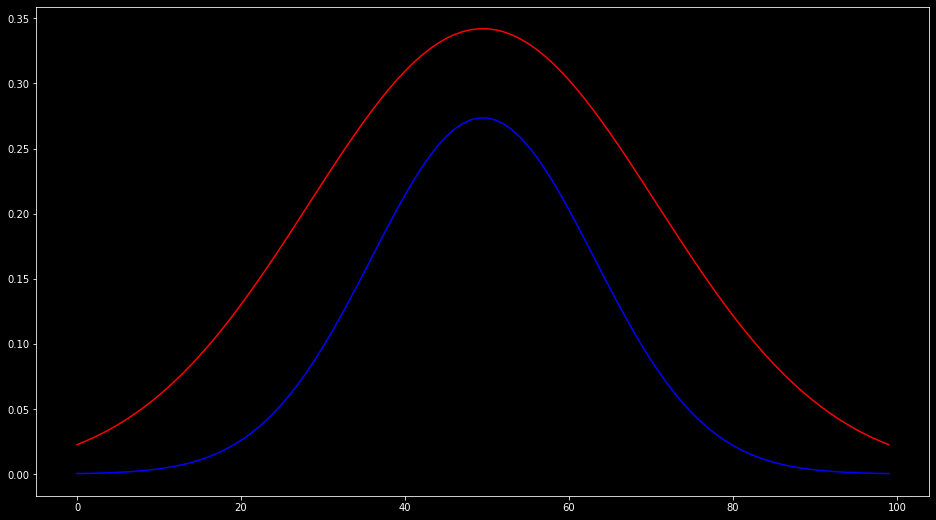

In [52]:
# P (x|y) =
# gausian curves example
plt.figure(figsize=(16, 9))
x = np.linspace(5, 10, 100)

gaus1 = (1 / np.sqrt(2*np.pi*np.var(x))) * np.exp(-(x-np.mean(x))**2/2*np.var(x))
plt.plot(gaus1, color="b")

x = np.linspace(1, 5, 100)
gaus2 = (1 / np.sqrt(2*np.pi*np.var(x))) * np.exp(-(x-np.mean(x))**2/2*np.var(x))
plt.plot(gaus2, color="r")

plt.show()

In [53]:
# load data, or actually...create my own
from data_generation import GenerateDatasets

dataset = GenerateDatasets()
dataset = dataset.make_blobs(nr_blobs=4,
                   nr_samples=1000,
                   nr_cols=2,
                   size_left=1,
                   mode=1.5,
                   size_right=2,
                   scale_row=1,
                   scale_col=1,
                   random_seed=True)
X, y = dataset

In [54]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

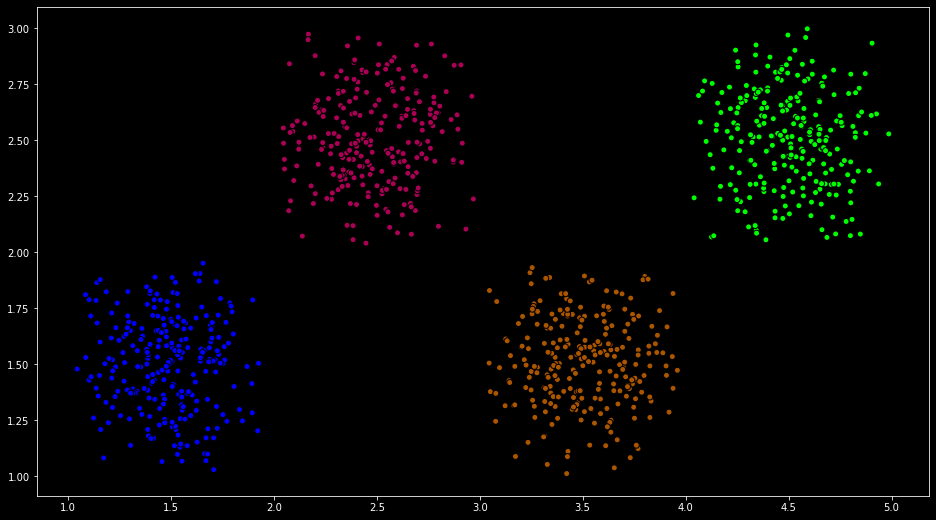

In [55]:
plt.figure(figsize=(16, 9))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="brg", edgecolors="k")
plt.show()

In [56]:
X_train[0], X_train[1], y_train[0]

(array([2.52439385, 2.36174166]), array([1.59593746, 1.66167416]), 1)

In [57]:
class NaiveBayes:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)  # Find the unique elements of an array
        n_classes = len(self._classes)
        
        # initialize mean, var, priors with zeros
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._variance = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)
        
        # calculate mean, variance and priors of each class
        for class_ in self._classes:
            # this filters out X data based on y labels. It means that  mean, var, priors below
            #   will be calculated for each class (y)
            X_c = X[class_==y]
            
            # new value will be calculated for columns (axis 0)
            # assign new value instead of initialised value at a specified row
            self._mean[class_, ...] = X_c.mean(axis=0)
            self._variance[class_, ...] = X_c.var(axis=0)
            
            # assign a value of how many values of a given class are in dataset
            #    at a given index of self._priors vector
            self._priors[class_] = len(X_c) / float(n_samples)
            
    def predict(self, X_test):
        y_pred = [self._predict(x_test_item) for x_test_item in X_test]
        return y_pred
        
    def _predict(self, x):
        posteriors = []
        
        for index, class_ in enumerate(self._classes):
            prior = np.log(self._priors[index])  # prior of a given class
            
            # log(P(X1|y1)) + ... + log(P(Xn|yn)) == class conditional probabilities
            class_conditional = np.sum(np.log(self._gausian_curve(index, x)))
            
            # log(P(X1|y1)) + ... + log(P(Xn|yn)) + log(P(y))
            posterior = class_conditional + prior
            
            # once the loop is over there is y score for each X_test vector (or scalar..etc) that
            #   waits to be evaluated (explained right below)
            posteriors.append(posterior)
        
        # return the class with highest number (score), in posteriors there will be number of scores the
        #   same as number of classes
        return self._classes[np.argmax(posteriors)] 
            
    def _gausian_curve(self, class_index, x):
        """calculate gausian curve,
        probability density"""
        mean = self._mean[class_index]
        variance = self._variance[class_index]
        denominator = 1/np.sqrt(2*np.pi*variance)
        numerator = np.exp(-(x-mean)**2 / (2*variance))
        return numerator * denominator

In [58]:
nb = NaiveBayes()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)


In [59]:
accuracy = np.sum(y_pred==y_test) / len(y_test)
accuracy

1.0

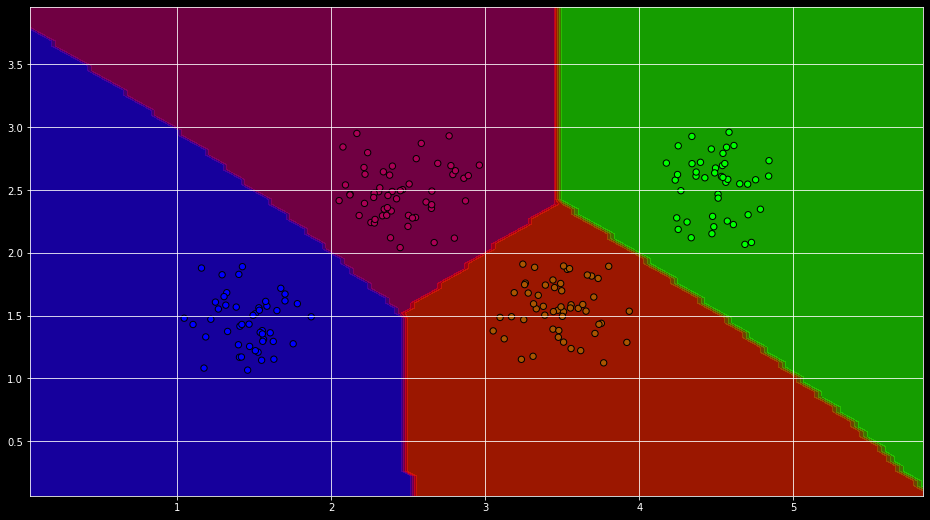

In [60]:
from data_plotting import Plots
plot = Plots()
plot.plot_decision_boundary(nb,
                           X_test,
                           y_test,
                           expand=1,
                           bound_smoot=100,
                           fig_size=(16, 9),
                           grid=True,
                           verbose=False,
                           cmap="brg")